In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
calls=pd.read_csv(r"/content/callsf0d4f5a.csv")
customers=pd.read_csv(r"/content/customers2afd6ea.csv")
sentiment=pd.read_csv(r"/content/sentiment_statisticscc1e57a.csv")
reason=pd.read_csv(r"/content/reason18315ff.csv")

In [54]:
df=pd.merge(calls,customers,on='customer_id',how='left')
df=pd.merge(df,sentiment,on='call_id',how='left')
df=pd.merge(df,reason,on='call_id',how='left')
df.head()

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason
0,4667960400,2033123310,963118,7/31/2024 23:56,08-01-2024 00:03,08-01-2024 00:34,\n\nAgent: Thank you for calling United Airlin...,Matthew Foster,4.0,963118,neutral,angry,-0.04,0.39,Voluntary Cancel
1,1122072124,8186702651,519057,08-01-2024 00:03,08-01-2024 00:06,08-01-2024 00:18,\n\nAgent: Thank you for calling United Airlin...,Tammy Walters,NaN,519057,calm,neutral,0.02,0.35,Booking
2,6834291559,2416856629,158319,7/31/2024 23:59,08-01-2024 00:07,08-01-2024 00:26,\n\nAgent: Thank you for calling United Airlin...,Jeffery Dixon,NaN,158319,neutral,polite,-0.13,0.32,IRROPS
3,2266439882,1154544516,488324,08-01-2024 00:05,08-01-2024 00:10,08-01-2024 00:17,\n\nAgent: Thank you for calling United Airlin...,David Wilkins,2.0,488324,neutral,frustrated,-0.20,0.20,Upgrade
4,1211603231,5214456437,721730,08-01-2024 00:04,08-01-2024 00:14,08-01-2024 00:23,\n\nAgent: Thank you for calling United Airlin...,Elizabeth Daniels,0.0,721730,neutral,polite,-0.05,0.35,Seating


In [55]:
df.head(10)

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason
0,4667960400,2033123310,963118,7/31/2024 23:56,08-01-2024 00:03,08-01-2024 00:34,\n\nAgent: Thank you for calling United Airlin...,Matthew Foster,4.0,963118,neutral,angry,-0.04,0.39,Voluntary Cancel
1,1122072124,8186702651,519057,08-01-2024 00:03,08-01-2024 00:06,08-01-2024 00:18,\n\nAgent: Thank you for calling United Airlin...,Tammy Walters,NaN,519057,calm,neutral,0.02,0.35,Booking
2,6834291559,2416856629,158319,7/31/2024 23:59,08-01-2024 00:07,08-01-2024 00:26,\n\nAgent: Thank you for calling United Airlin...,Jeffery Dixon,NaN,158319,neutral,polite,-0.13,0.32,IRROPS
3,2266439882,1154544516,488324,08-01-2024 00:05,08-01-2024 00:10,08-01-2024 00:17,\n\nAgent: Thank you for calling United Airlin...,David Wilkins,2.0,488324,neutral,frustrated,-0.20,0.20,Upgrade
4,1211603231,5214456437,721730,08-01-2024 00:04,08-01-2024 00:14,08-01-2024 00:23,\n\nAgent: Thank you for calling United Airlin...,Elizabeth Daniels,0.0,721730,neutral,polite,-0.05,0.35,Seating
5,5297766997,5590154991,817160,08-01-2024 00:11,08-01-2024 00:16,08-01-2024 00:40,\n\nAgent: Thank you for calling United Airlin...,Emily Alexander,5.0,817160,calm,calm,0.10,0.11,Mileage Plus
6,324593040,6774865122,519057,08-01-2024 00:08,08-01-2024 00:21,08-01-2024 00:34,\n\nAgent: Thank you for calling United Airlin...,James Lawrence,NaN,519057,neutral,frustrated,0.00,0.25,Checkout
7,8902603117,7974326984,488324,08-01-2024 00:13,08-01-2024 00:21,08-01-2024 00:29,\n\nAgent: Thank you for calling United Airlin...,Megan Craig,2.0,488324,calm,angry,0.11,0.35,Mileage Plus
8,7222687732,8023417234,957331,08-01-2024 00:14,08-01-2024 00:22,08-01-2024 00:35,\n\nAgent: Thank you for calling United Airlin...,Alexa Martinez,1.0,957331,calm,neutral,0.06,0.54,Mileage Plus
9,4113684017,1528835057,158319,08-01-2024 00:20,08-01-2024 00:28,08-01-2024 00:37,\n\nAgent: Thank you for calling United Airlin...,Jonathan Parker,NaN,158319,neutral,angry,-0.19,0.29,IRROPS


In [56]:
import pandas as pd

def print_missing_data(df, top_n=10):
    """
    Function to calculate and print the total and percentage of missing values in a DataFrame.

    Parameters:
    - df: Pandas DataFrame.
    - top_n: Number of columns with the most missing values to display. Default is 10.
    """
    # Calculate total and percentage of missing values
    total = df.isnull().sum().sort_values(ascending=False)  # Total missing values
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)  # Percent missing values

    # Combine total and percent into a DataFrame
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

    # Display the top N columns with the most missing data
    print(f"Top {top_n} columns with missing data:")
    print(missing_data.head(top_n))

# Assuming df is your DataFrame
print_missing_data(df, top_n=10)

Top 10 columns with missing data:
                         Total   Percent
elite_level_code         25767  0.358822
primary_call_reason       5157  0.071815
agent_tone                 217  0.003022
average_sentiment          109  0.001518
call_id                      0  0.000000
customer_id                  0  0.000000
agent_id_x                   0  0.000000
call_start_datetime          0  0.000000
agent_assigned_datetime      0  0.000000
call_end_datetime            0  0.000000


In [57]:
# Changing the datatype to datetime64
df['call_start_datetime'] = df['call_start_datetime'].astype(str)
df['call_start_datetime'] = df['call_start_datetime'].str.replace('-', '/')
df['call_start_datetime'] = pd.to_datetime(df['call_start_datetime'], errors='coerce')
invalid_dates = df[df['call_start_datetime'].isna()]

df['call_end_datetime'] = df['call_end_datetime'].astype(str)
df['call_end_datetime'] = df['call_end_datetime'].str.replace('-', '/')
df['call_end_datetime'] = pd.to_datetime(df['call_end_datetime'], errors='coerce')
invalid_dates = df[df['call_end_datetime'].isna()]

df['agent_assigned_datetime'] = df['agent_assigned_datetime'].astype(str)
df['agent_assigned_datetime'] = df['agent_assigned_datetime'].str.replace('-', '/')
df['agent_assigned_datetime'] = pd.to_datetime(df['agent_assigned_datetime'], errors='coerce')
invalid_dates = df[df['agent_assigned_datetime'].isna()]


df['call_end_datetime'] = pd.to_datetime(df['call_end_datetime'], errors='coerce')
invalid_dates = df[df['call_end_datetime'].isna()]

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   call_id                  71810 non-null  int64         
 1   customer_id              71810 non-null  int64         
 2   agent_id_x               71810 non-null  int64         
 3   call_start_datetime      71810 non-null  datetime64[ns]
 4   agent_assigned_datetime  71810 non-null  datetime64[ns]
 5   call_end_datetime        71810 non-null  datetime64[ns]
 6   call_transcript          71810 non-null  object        
 7   customer_name            71810 non-null  object        
 8   elite_level_code         46043 non-null  float64       
 9   agent_id_y               71810 non-null  int64         
 10  agent_tone               71593 non-null  object        
 11  customer_tone            71810 non-null  object        
 12  average_sentiment        71701 n

In [59]:
df.dropna(subset=['agent_tone','average_sentiment'],inplace=True)
df['elite_level_code'].fillna(-1,inplace=True)
df['primary_call_reason'].fillna('unknown',inplace=True)
df.drop_duplicates(inplace=True)

<ipython-input-59-6097a25cd8d8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['elite_level_code'].fillna(-1,inplace=True)
<ipython-input-59-6097a25cd8d8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [60]:
print_missing_data(df, top_n=10)

Top 10 columns with missing data:
                         Total  Percent
call_id                      0      0.0
customer_id                  0      0.0
agent_id_x                   0      0.0
call_start_datetime          0      0.0
agent_assigned_datetime      0      0.0
call_end_datetime            0      0.0
call_transcript              0      0.0
customer_name                0      0.0
elite_level_code             0      0.0
agent_id_y                   0      0.0


In [61]:
df['call_duration'] = (df['call_end_datetime'] - df['call_start_datetime']).dt.total_seconds()
df['handle_time'] = (df['call_end_datetime'] - df['agent_assigned_datetime']).dt.total_seconds()
df['wait_time'] = (df['agent_assigned_datetime'] - df['call_start_datetime']).dt.total_seconds()
df['hour_of_day'] = df['call_start_datetime'].dt.hour
df['day_of_week'] = df['call_start_datetime'].dt.dayofweek  # Monday=0, Sunday=6
df['day_of_month'] = df['call_start_datetime'].dt.day
df['month'] = df['call_start_datetime'].dt.month

In [62]:
df.head()

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,agent_id_y,...,average_sentiment,silence_percent_average,primary_call_reason,call_duration,handle_time,wait_time,hour_of_day,day_of_week,day_of_month,month
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,Matthew Foster,4.0,963118,...,-0.04,0.39,Voluntary Cancel,2280.0,1860.0,420.0,23,2,31,7
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,Tammy Walters,-1.0,519057,...,0.02,0.35,Booking,900.0,720.0,180.0,0,3,1,8
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,Jeffery Dixon,-1.0,158319,...,-0.13,0.32,IRROPS,1620.0,1140.0,480.0,23,2,31,7
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,David Wilkins,2.0,488324,...,-0.20,0.20,Upgrade,720.0,420.0,300.0,0,3,1,8
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,Elizabeth Daniels,0.0,721730,...,-0.05,0.35,Seating,1140.0,540.0,600.0,0,3,1,8


Mean Squared Error: 1.3274924860132847e-24
R^2 Score: 1.0


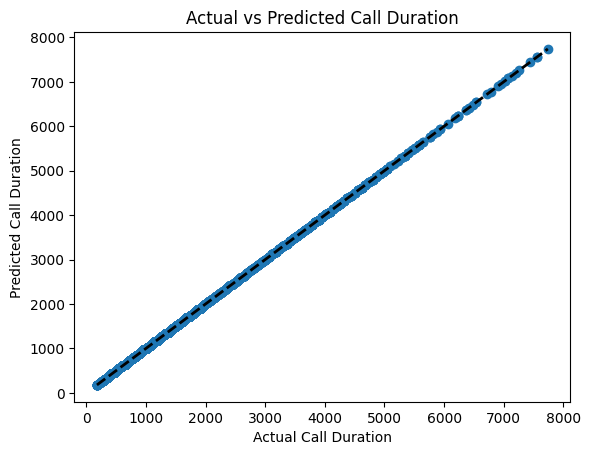

In [63]:
# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df[['handle_time', 'wait_time']]
y = df['call_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualize the predictions
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Call Duration')
plt.ylabel('Predicted Call Duration')
plt.title('Actual vs Predicted Call Duration')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71593 entries, 0 to 71809
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   call_id                  71593 non-null  int64         
 1   customer_id              71593 non-null  int64         
 2   agent_id_x               71593 non-null  int64         
 3   call_start_datetime      71593 non-null  datetime64[ns]
 4   agent_assigned_datetime  71593 non-null  datetime64[ns]
 5   call_end_datetime        71593 non-null  datetime64[ns]
 6   call_transcript          71593 non-null  object        
 7   customer_name            71593 non-null  object        
 8   elite_level_code         71593 non-null  float64       
 9   agent_id_y               71593 non-null  int64         
 10  agent_tone               71593 non-null  object        
 11  customer_tone            71593 non-null  object        
 12  average_sentiment        71593 non-nu

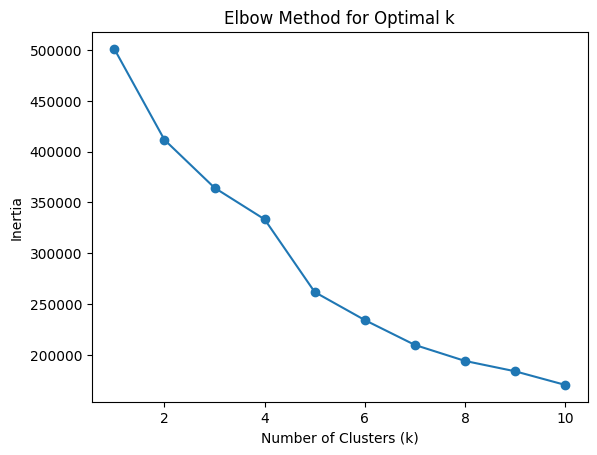

Cluster Centers:
    handle_time   wait_time  call_duration  hour_of_day  day_of_week  \
0   474.461686  306.903298     781.364983    12.459901     4.132770   
1  2485.453342  431.849107    2917.302449    12.313567     4.157114   
2   499.692524  563.323431    1063.015956    12.317306     4.098000   

   day_of_month     month  
0     16.040210  8.000000  
1     15.891066  7.999735  
2     15.792730  8.000000  
   agent_id_x  handle_time  wait_time  call_duration  cluster
0      963118       1860.0      420.0         2280.0        1
1      519057        720.0      180.0          900.0        0
2      158319       1140.0      480.0         1620.0        1
3      488324        420.0      300.0          720.0        0
4      721730        540.0      600.0         1140.0        2


In [66]:
# K Means Clustering of agents with various features
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# features for clustering
features = ['handle_time', 'wait_time', 'call_duration', 'hour_of_day', 'day_of_week', 'day_of_month', 'month']

df_clustering = df[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# Elbow method to determine optimal k
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_scaled)

df['cluster'] = kmeans.labels_

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=features)

print("Cluster Centers:\n", cluster_df)

print(df[['agent_id_x', 'handle_time', 'wait_time', 'call_duration', 'cluster']].head())


In [67]:
# Checking for the ARIMA MODEL
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming df_cleaned is your DataFrame and 'handle_time' is the target variable

df_cleaned = df.copy()
result = adfuller(df['handle_time'].dropna())

adf_statistic = result[0]
p_value = result[1]
num_lags = result[2]
num_obs = result[3]
critical_values = result[4]


print('Augmented Dickey-Fuller Test Results:')
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print(f'Number of Lags: {num_lags}')
print(f'Number of Observations: {num_obs}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Interpretation
if p_value < 0.05:
    print("The time series is stationary (reject the null hypothesis).")
else:
    print("The time series is non-stationary (fail to reject the null hypothesis).")

#Data set is non-stationary so ARIMA can not be done to it , it is difficult to predit the data

Augmented Dickey-Fuller Test Results:
ADF Statistic: -187.65261293792736
p-value: 0.0
Number of Lags: 1
Number of Observations: 71591
Critical Values:
   1%: -3.430441345762544
   5%: -2.8615803732193896
   10%: -2.566791489282686
The time series is stationary (reject the null hypothesis).
